<a href="https://colab.research.google.com/github/TusharAMD/Machine-Learning/blob/master/Machine_Learning_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
##Importing Files

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1

---



In [60]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [61]:
#loading
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [62]:
#preview data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [63]:
#getting rows and columns
print(data.shape)

(5000, 14)


In [64]:
print(data.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [65]:
#Columns
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [66]:
#Description of Data
print(data.describe())

                ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]


In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [68]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [69]:
#no null values found

# Step 2


In [70]:
(data['Experience'] < 0).sum()

52

In [71]:
data_new = data[data['Experience'] > 0]

In [72]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIP Code,4882.0,93150.227366,2130.612121,9307.0,91910.25,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


# Step 3

---



**1) Number of unique in each column?**

In [73]:
for col in data_new.columns:
    print("The unique elements of %s are %2d" %(col,data_new[col].nunique()))

The unique elements of ID are 4882
The unique elements of Age are 43
The unique elements of Experience are 43
The unique elements of Income are 162
The unique elements of ZIP Code are 466
The unique elements of Family are  4
The unique elements of CCAvg are 108
The unique elements of Education are  3
The unique elements of Mortgage are 346
The unique elements of Personal Loan are  2
The unique elements of Securities Account are  2
The unique elements of CD Account are  2
The unique elements of Online are  2
The unique elements of CreditCard are  2


In [74]:
data_new=data_new.drop('ZIP Code',axis = 1)

**2) Number of people with zero mortgage?**

In [75]:
#(data_new.Mortgage==0).sum()

In [76]:
print(data_new['Mortgage'][data_new['Mortgage']==0].count())

3371


**3) Number of people with zero credit card spending per month?**

In [77]:
print(data_new['CreditCard'][data_new['CreditCard']==0].count())

3442


**4) Value counts of all categorical columns.**

In [78]:
for col in data_new.columns:
    if data_new[col].nunique() >=2 and data_new[col].nunique()<=5:
        print(data_new[col].value_counts())
    

1    1460
2    1256
4    1179
3     987
Name: Family, dtype: int64
1    2063
3    1452
2    1367
Name: Education, dtype: int64
0    4409
1     473
Name: Personal Loan, dtype: int64
0    4374
1     508
Name: Securities Account, dtype: int64
0    4582
1     300
Name: CD Account, dtype: int64
1    2923
0    1959
Name: Online, dtype: int64
0    3442
1    1440
Name: CreditCard, dtype: int64


**5) Univariate and Bivariate analysis**

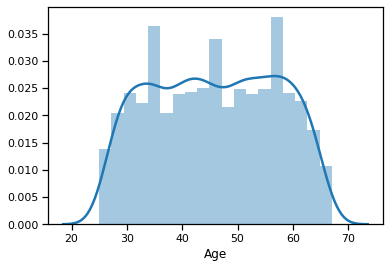

In [79]:
sns.distplot(data_new.Age)

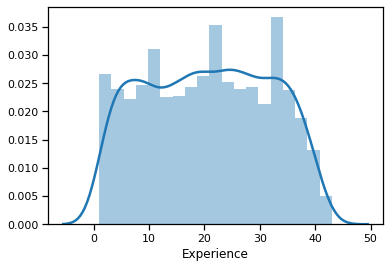

In [80]:
sns.distplot(data_new.Experience)

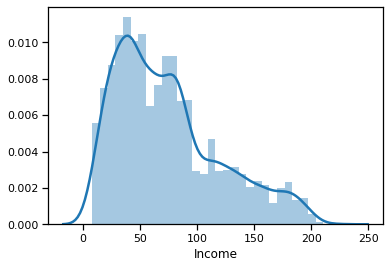

In [81]:
sns.distplot(data_new.Income)

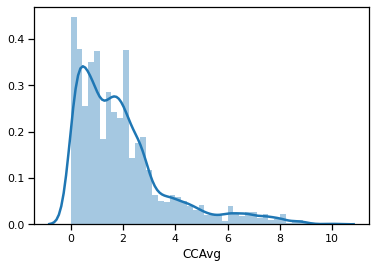

In [82]:
sns.distplot(data_new.CCAvg)

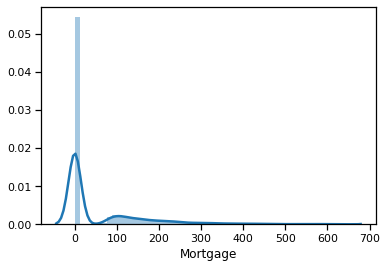

In [83]:
sns.distplot(data_new.Mortgage)

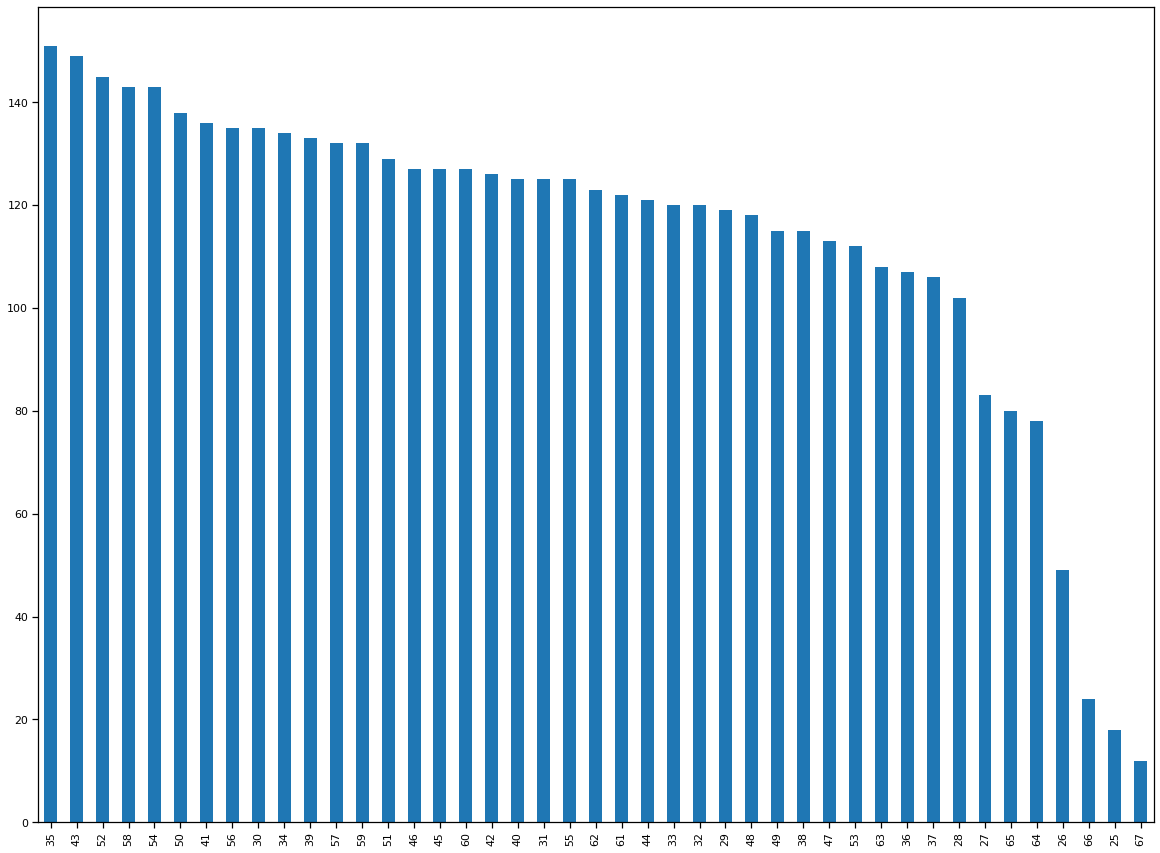

In [84]:
plt.figure(figsize=(20,15))
data_new['Age'].value_counts().sort_values(ascending=False).plot(x='Age',kind='bar')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


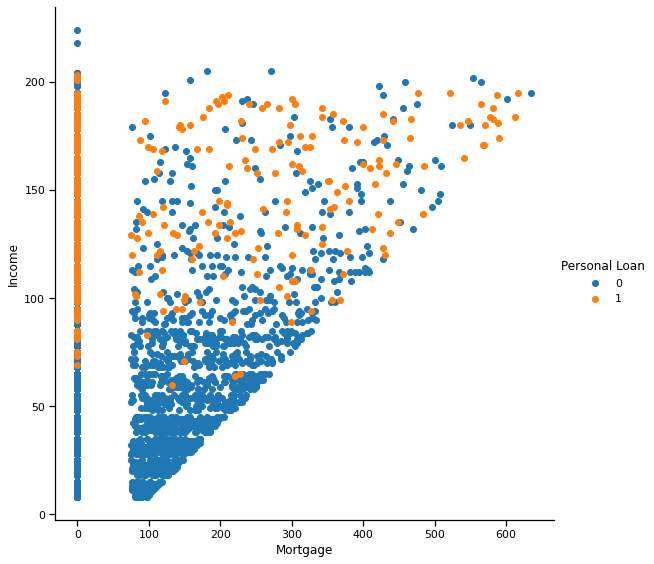

In [85]:
sns.FacetGrid(data_new,hue='Personal Loan',size=8)\
    .map(plt.scatter,"Mortgage","Income")\
    .add_legend()

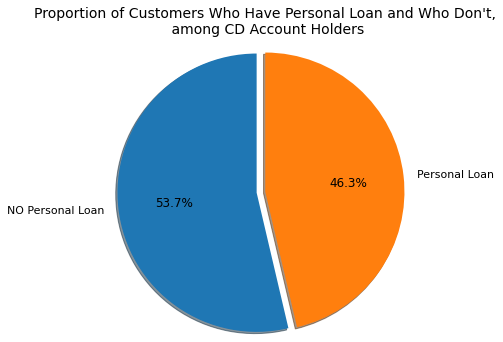

In [86]:
series = data_new[data_new['CD Account'] == 1]['Personal Loan'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.show()

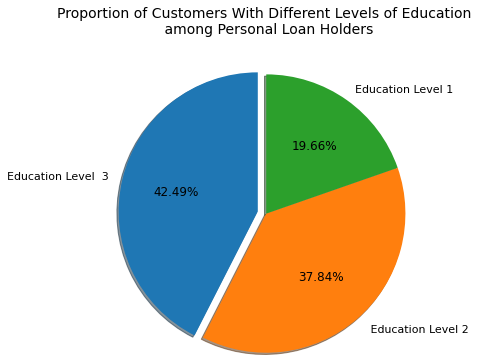

In [87]:
series_edu_4 = data_new[data_new['Personal Loan'] == 1]['Education'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(series_edu_4, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL.png', bbox_inches = 'tight');


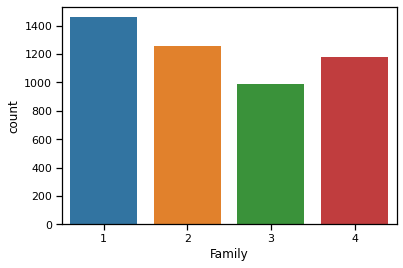

In [88]:
sns.countplot(data_new.Family)

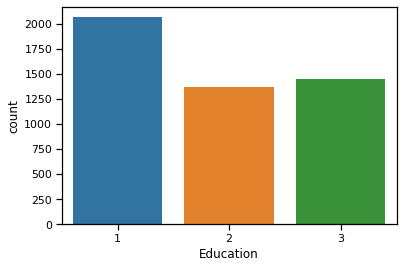

In [89]:
sns.countplot(data_new.Education)

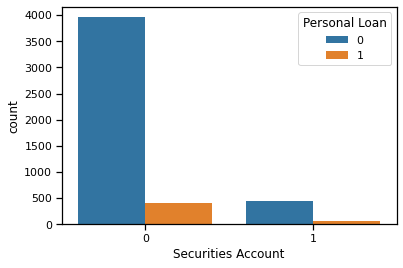

In [90]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=data_new)

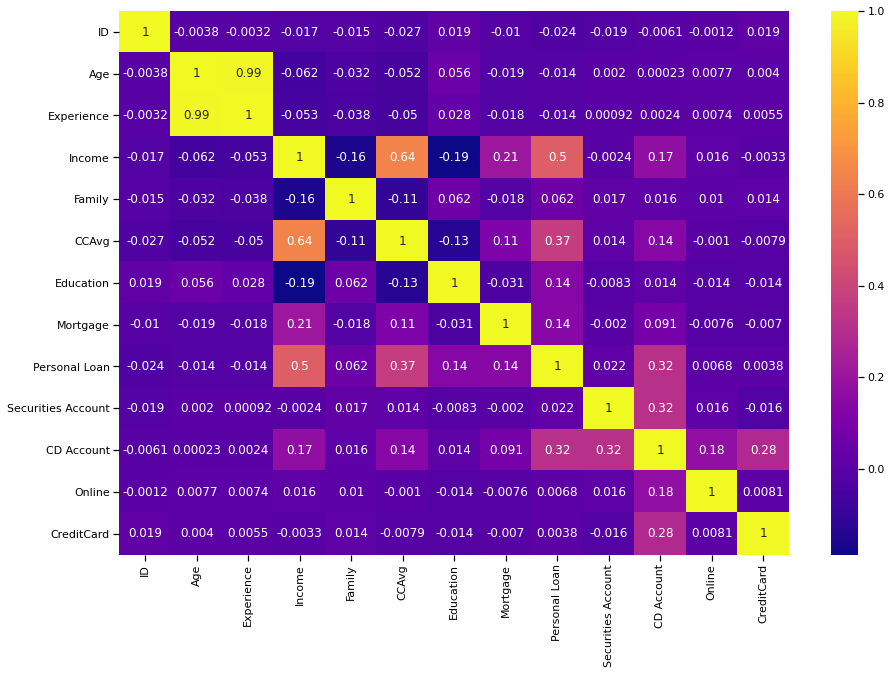

In [91]:
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(data_new.corr(),cmap="plasma",annot=True)

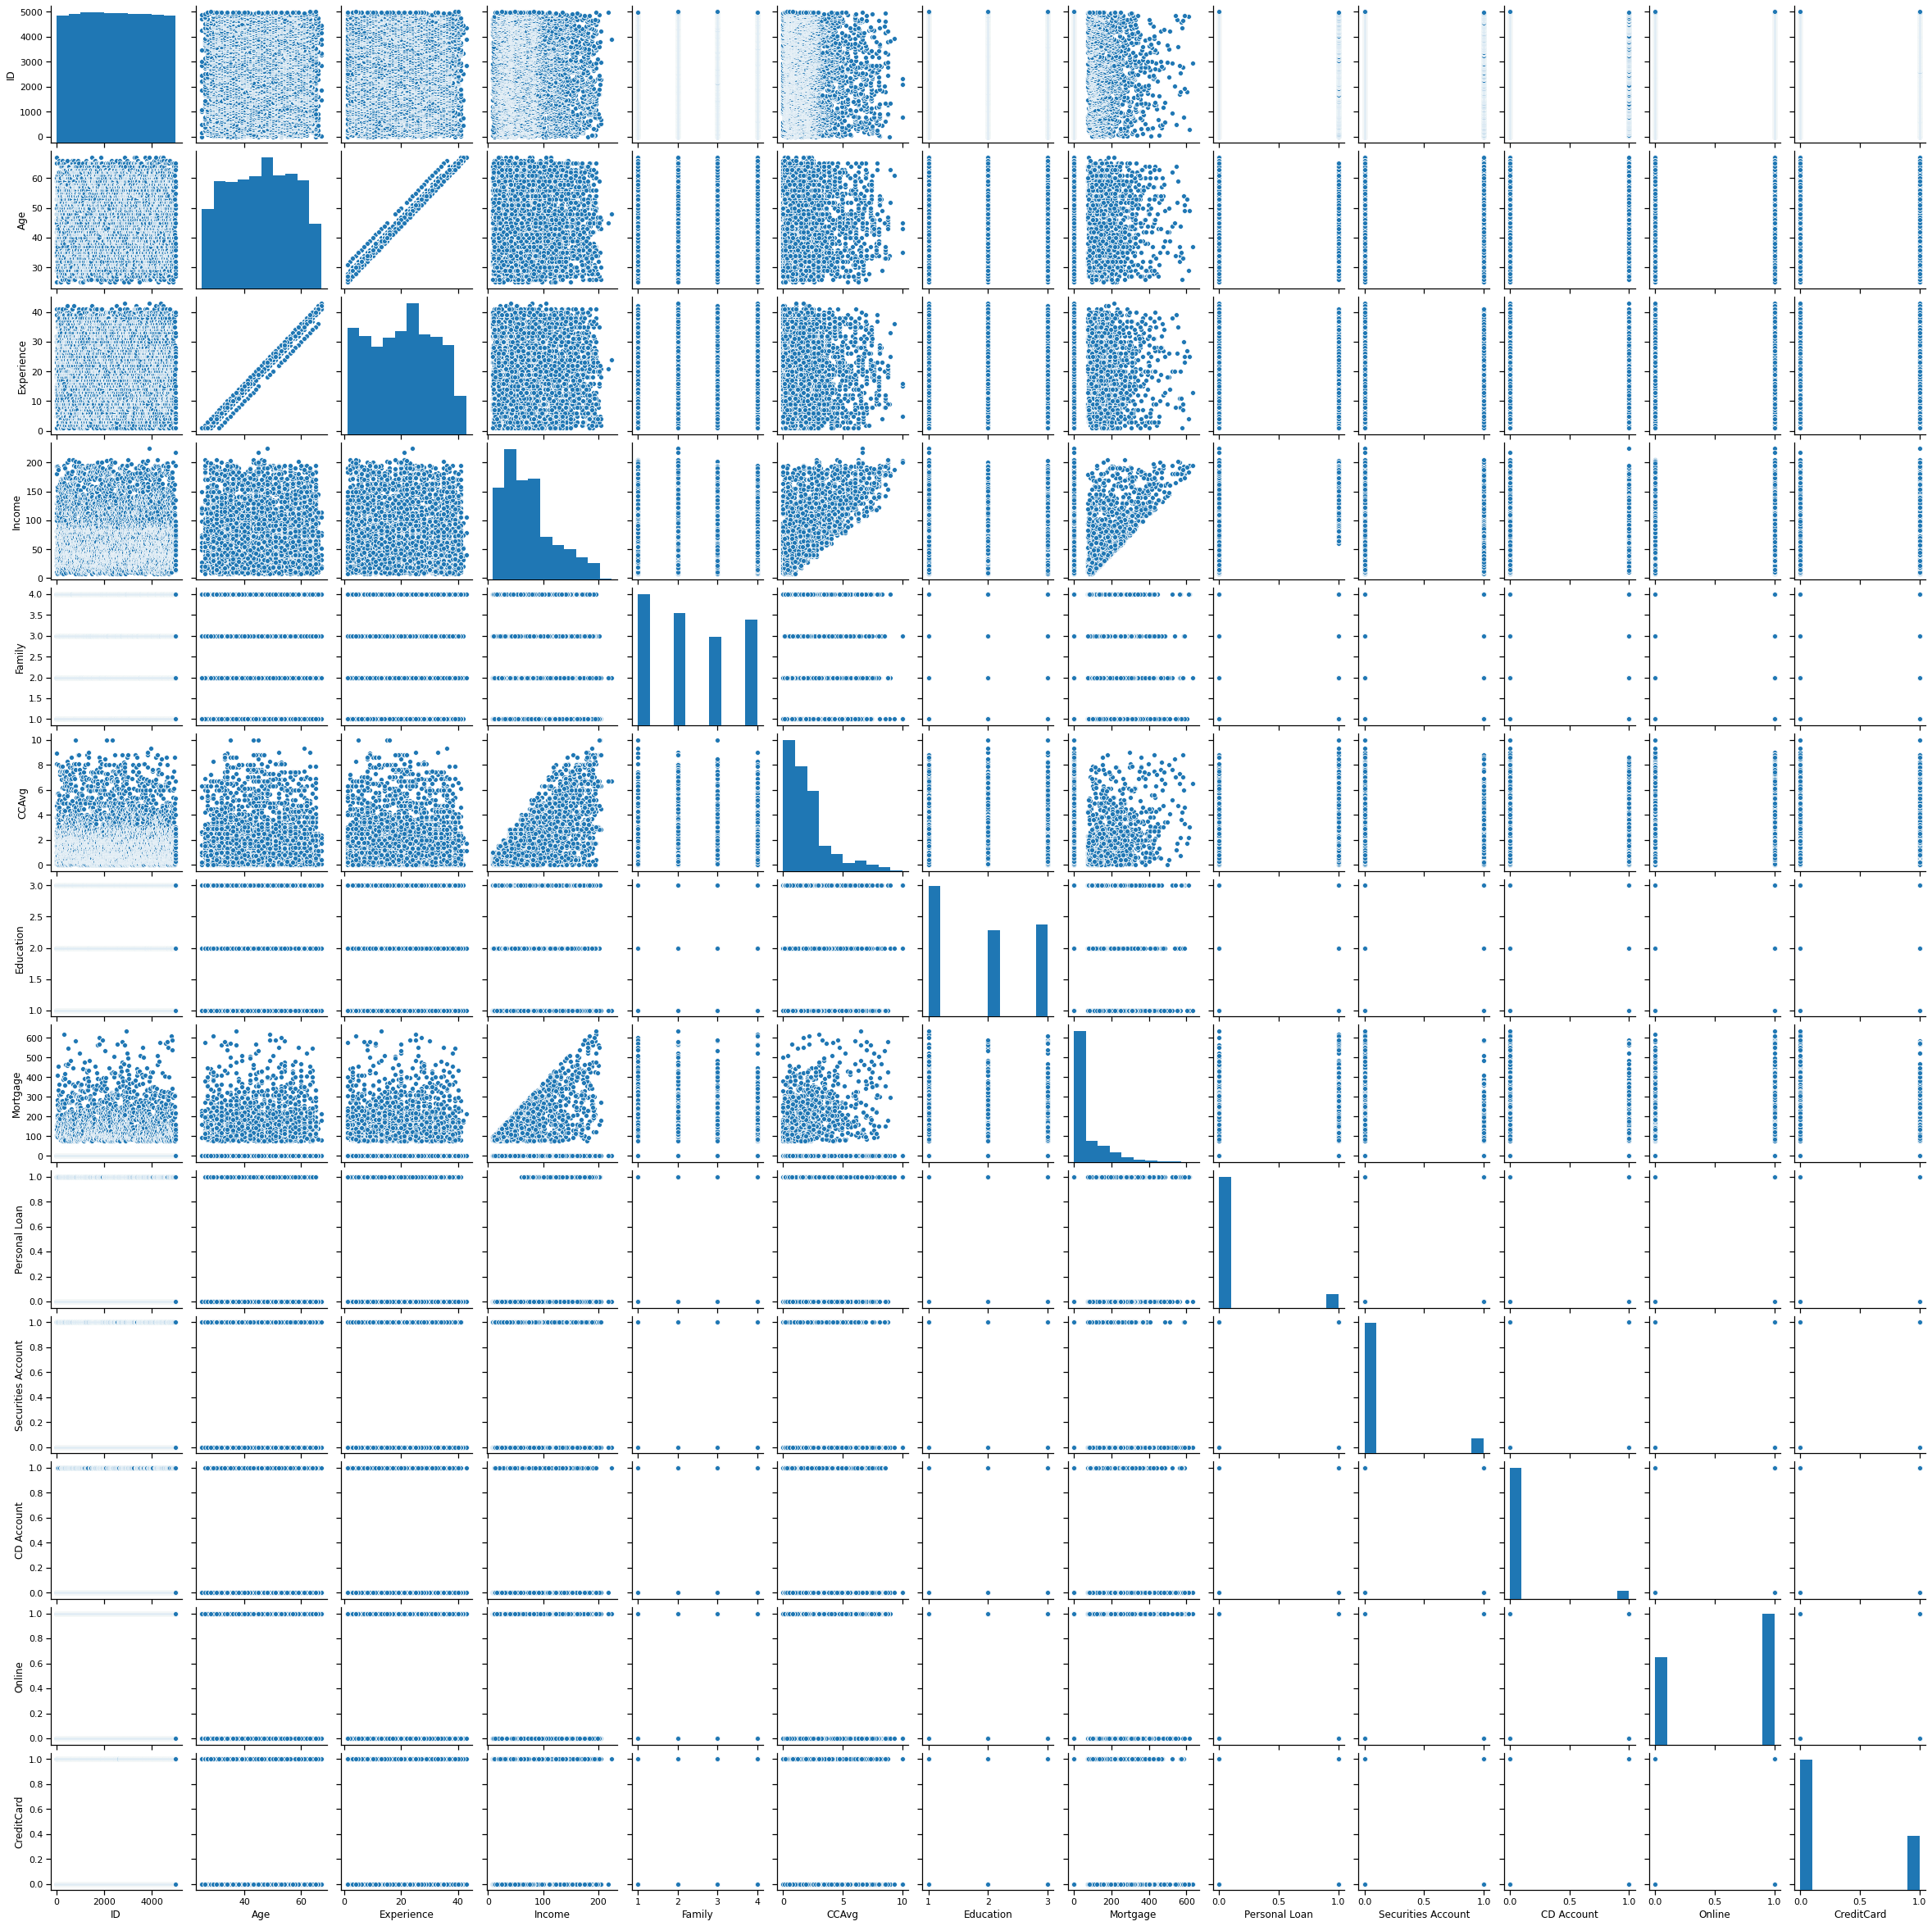

In [92]:
sns.pairplot(data_new)

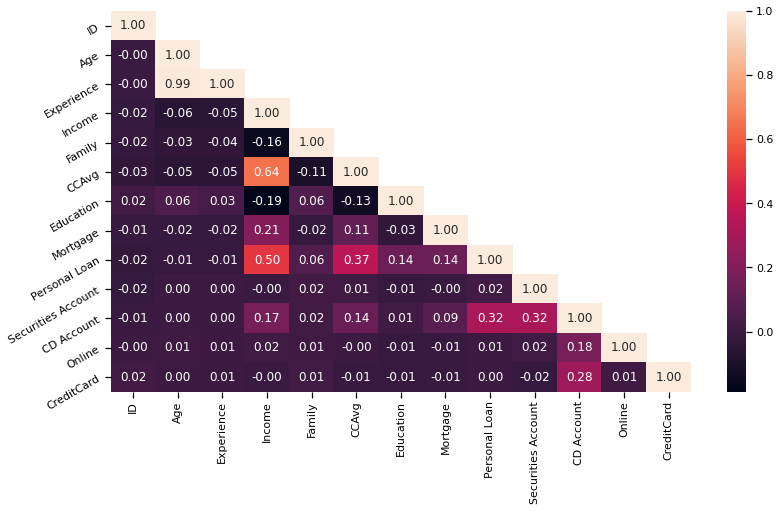

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data_new.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Age and Experience are highly correlated

Income and CCAvg are moderately correlated

Personal loan and Income are also positively correlated.

#Step 4

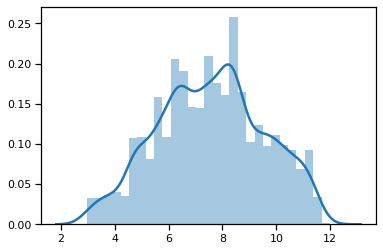

In [94]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_new["Income"].values.reshape(-1,1))
temp=pt.transform(data_new["Income"].values.reshape(-1,1))
sns.distplot(temp)

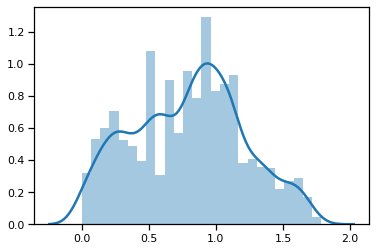

In [95]:
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_new["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_new["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

In [96]:
data_new["Mortgage_Int"]=pd.cut(data_new["Mortgage"], bins=[0,100,200,300,400,500,600,700], labels=[0,1,2,3,4,5,6], include_lowest=True)
data.drop("Mortgage", axis=1,inplace=True)

In [97]:
data_new.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,0


#Training

**Logical Reg**

In [98]:
X = data_new.loc[:, data_new.columns!= 'Personal Loan']
y = data_new.loc[:, data_new.columns == 'Personal Loan']

In [99]:
#Splitting X and y 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [100]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3417, 13), (1465, 13), (3417, 1), (1465, 1))

In [101]:
#fit the logistic regression

#import the library
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
#Prediction of the model

y_pred = logreg.predict(X_test)

In [103]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
#import the metric class

from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[1311,   18],
       [  62,   74]])

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
l = accuracy_score(y_test,y_pred)

Accuracy: 0.9829351535836177
Precision: 0.944
Recall: 0.8676470588235294


We have got a accuracy score of 92%. This considered as a good accuracy.

Precision :- Precision is all about precise. Logistic Model predicted customers will take loans 54% of the time

Recall :- If the people who have taken loan in the test set and your logistic regression model can identify 39% of the time. 

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1329
           1       0.80      0.54      0.65       136

    accuracy                           0.95      1465
   macro avg       0.88      0.77      0.81      1465
weighted avg       0.94      0.95      0.94      1465



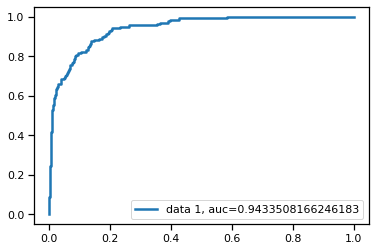

In [107]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Area under the curve is 0.94. 

Note : 1 is best 0.5 is worst

**Naive Bayes**

In [108]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = data_new.columns
scaler = preprocessing.StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
model_naive = GaussianNB()
model_naive.fit(s_X_train, y_train)
y_pred = model_naive.predict(s_X_test)
print(classification_report(y_test,y_pred))
n = accuracy_score(y_test,y_pred)
print(n)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1329
           1       0.44      0.66      0.53       136

    accuracy                           0.89      1465
   macro avg       0.70      0.79      0.73      1465
weighted avg       0.92      0.89      0.90      1465

0.8907849829351536


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model_naive.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.929419510467844


AUC is 0.92 lesser than previous one i.e. logical regression.

**K-Nearest Neighbour**

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(s_X_train, y_train)
y_pred = knn.predict(s_X_test)
print(classification_report(y_test,y_pred))
k = accuracy_score(y_test,y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1329
           1       0.88      0.59      0.70       136

    accuracy                           0.95      1465
   macro avg       0.92      0.79      0.84      1465
weighted avg       0.95      0.95      0.95      1465

0.9542662116040955


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
y_predictProb = knn.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9304347585535343


96% accuracy in determining whether customer will buy personal loan or not.

Recall 65% AUC 94%

**Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
d_model.fit(s_X_train,y_train)
y_pred = d_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
d = accuracy_score(y_test,y_pred)
print(d)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1329
           1       0.97      0.86      0.91       136

    accuracy                           0.98      1465
   macro avg       0.98      0.93      0.95      1465
weighted avg       0.98      0.98      0.98      1465

0.9849829351535836


In [118]:
y_predictProb = d_model.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9943317620501926


99% accuracy in determining whether customer will buy personal loan or not.

Recall 86% AUC 99%

**Random Forrest**

In [119]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(criterion='gini', n_estimators=150 ,max_depth=3, max_features = None, oob_score=True)
randomforest_model.fit(s_X_train,y_train) 
print("The out of bag score is", randomforest_model.oob_score_)
y_pred = randomforest_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
r = accuracy_score(y_test,y_pred)
print(r)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The out of bag score is 0.9806848112379281
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1329
           1       0.94      0.87      0.90       136

    accuracy                           0.98      1465
   macro avg       0.97      0.93      0.95      1465
weighted avg       0.98      0.98      0.98      1465

0.9829351535836177


In [120]:
y_predictProb = randomforest_model.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9968657327490815


99% accuracy in determining whether customer will buy personal loan or not.

Recall 87% AUC 99%

# Confusion Matrix

In [121]:
from sklearn import metrics

Logistic_pred = logreg.predict(s_X_test)
Logistic = metrics.confusion_matrix(Logistic_pred, y_test)

RF = metrics.confusion_matrix(y_test, randomforest_model.predict(s_X_test))

dt_pred = d_model.predict(s_X_test)
DT = metrics.confusion_matrix(dt_pred, y_test)

KNN = metrics.confusion_matrix(y_test, knn.predict(s_X_test))

Naive_pred = model_naive.predict(s_X_test)
Naive = metrics.confusion_matrix(Naive_pred, y_test)

print("Confusion matrix for Logistic Regression = \n", Logistic,"\n")
print("Confusion matrix for Naive Bayes = \n", Naive,"\n")
print("Confusion matrix for K Nearest Neighbour = \n", KNN, "\n")
print("Confusion matrix for Decision Tree = \n", DT,"\n")
print("Confusion matrix for Random Forest = \n", RF , "\n")

Confusion matrix for Logistic Regression = 
 [[711  24]
 [618 112]] 

Confusion matrix for Naive Bayes = 
 [[1215   46]
 [ 114   90]] 

Confusion matrix for K Nearest Neighbour = 
 [[1318   11]
 [  56   80]] 

Confusion matrix for Decision Tree = 
 [[1326   19]
 [   3  117]] 

Confusion matrix for Random Forest = 
 [[1322    7]
 [  18  118]] 



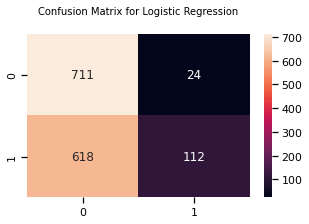

In [122]:
plt.subplots(figsize = (5,3))
sns.heatmap(metrics.confusion_matrix(Logistic_pred, y_test), annot = True,fmt ='g')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 10,loc = 'center', pad = 20)
plt.show()

# Comparison among the above models

In [125]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes' , 'KNN' ,'Decision Tree', 'Random Forest'],
    'Score': [l,n,k,d,r]})
result_df = results.sort_values(by='Score', ascending=False)
result_df.head()

,Model,Score
3,Decision Tree,0.984983
0,Logistic Regression,0.982935
4,Random Forest,0.982935
2,KNN,0.954266
1,Naive Bayes,0.890785


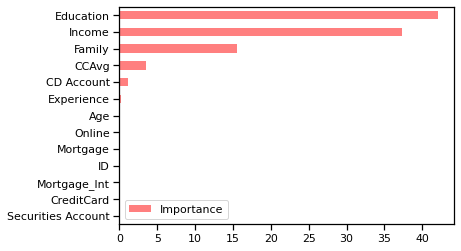

In [126]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',alpha = 0.5 )
plt.show()

In [129]:
labels=data_new['Personal Loan']
features=data_new[['Education', 'Income', 'Family', 'CCAvg','CD Account']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=5 )

In [130]:
col_names = data_new.columns
scaler = preprocessing.StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)

In [131]:
randomforest_model = RandomForestClassifier(criterion='gini', n_estimators=150 ,max_depth=3, max_features = None, oob_score=True)
randomforest_model.fit(s_X_train,y_train) 
print("The out of bag score is", randomforest_model.oob_score_)
y_pred = randomforest_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
r = accuracy_score(y_test,y_pred)
print(r)

The out of bag score is 0.9830260462393913
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1319
           1       0.98      0.86      0.92       146

    accuracy                           0.98      1465
   macro avg       0.98      0.93      0.95      1465
weighted avg       0.98      0.98      0.98      1465

0.9843003412969283


Using K Fold Validation

In [136]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: Mean = %f STD = (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: Mean = 0.943057 STD = (0.009330)
NB: Mean = 0.880176 STD = (0.013241)
KNN: Mean = 0.901474 STD = (0.010788)
CART: Mean = 0.980749 STD = (0.006544)
RF: Mean = 0.986891 STD = (0.004218)


It looks like Random Forest is best then decision tree, then logical regression

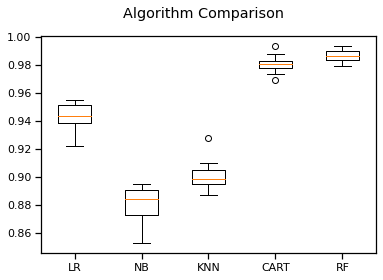

In [137]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

At last, it looks like random forest is the best classifier

Random forest handles outliners by binning them

Also the data doesn't require much preprocessing